# Previsão de Evasão de Clientes Bancários

### Informações do Aluno

- **Curso**: Programa de Pós-Graduação em Computação Aplicada - UnB
- **Disciplina**: Análise Estatística de Dados e Informação
- **Data**: 12 de janeiro de 2025
- **Autor**: Ebenezer Andrade da Silva
- **Matricula**: 241134715
- **Tarefa 5**

### Fonte dos Dados
Os dados utilizados neste notebook são públicos e estão disponíveis no Kaggle. Você pode acessá-los através do link abaixo:

[Predicting Churn for Bank Customers - Kaggle](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers?resource=download)

### Estrutura do Notebook
1. **Importação das Bibliotecas**
2. **Carregamento dos Dados**
3. **Análise Exploratória de Dados (EDA)**
5. **Pré-processamento dos dados**
6. **Treinamento do modelo de Regressão Logística**
7. **Avaliação do Modelo**
8. **Conclusão**


### Importação das Bibliotecas

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

### Carregamento dos Dados

In [14]:
file_path = "Churn_Modelling.csv"
data = pd.read_csv(file_path)

### Análise Exploratória de Dados (EDA)

In [64]:
print("Informações do Conjunto de Dados:")
print(data.info())

Informações do Conjunto de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   IsActiveMember   10000 non-null  int64  
 6   EstimatedSalary  10000 non-null  float64
 7   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 625.1 KB
None


In [43]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,101348.88,1
1,608,41,1,83807.86,1,1,112542.58,0
2,502,42,8,159660.80,3,0,113931.57,1
3,699,39,1,0.00,2,0,93826.63,0
4,850,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,0,96270.64,0
9996,516,35,10,57369.61,1,1,101699.77,0
9997,709,36,7,0.00,1,1,42085.58,1
9998,772,42,3,75075.31,2,0,92888.52,1


In [62]:
print("Estatísticas Resumidas:")
print(data.describe())

Estatísticas Resumidas:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

       IsActiveMember  EstimatedSalary        Exited  
count    10000.000000     10000.000000  10000.000000  
mean         0.515100    100090.239881      0.203700  
std          0.499797     57510.492818      0.402769  
min          0.000000     

In [63]:
print("Valores ausentes:")
print(data.isnull().sum())

Valores ausentes:
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


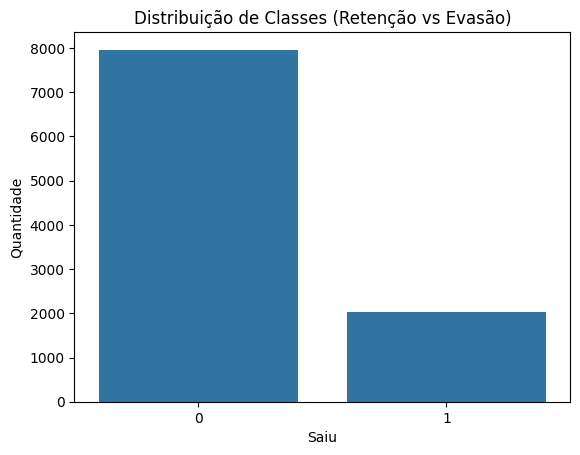

In [54]:
# Distribuição de Classes
sns.countplot(x="Exited", data=data)
plt.title("Distribuição de Classes (Retenção vs Evasão)")
plt.xlabel("Saiu")
plt.ylabel("Quantidade")
plt.show()

Este gráfico de barras apresenta a distribuição da variável ***Exited***, indicando se um cliente permaneceu (**0**) ou saiu (**1**) do banco, com uma desproporção evidente entre as classes: há significativamente mais clientes que permaneceram. Esse desbalanceamento pode afetar o desempenho de modelos preditivos, favorecendo a classe majoritária.

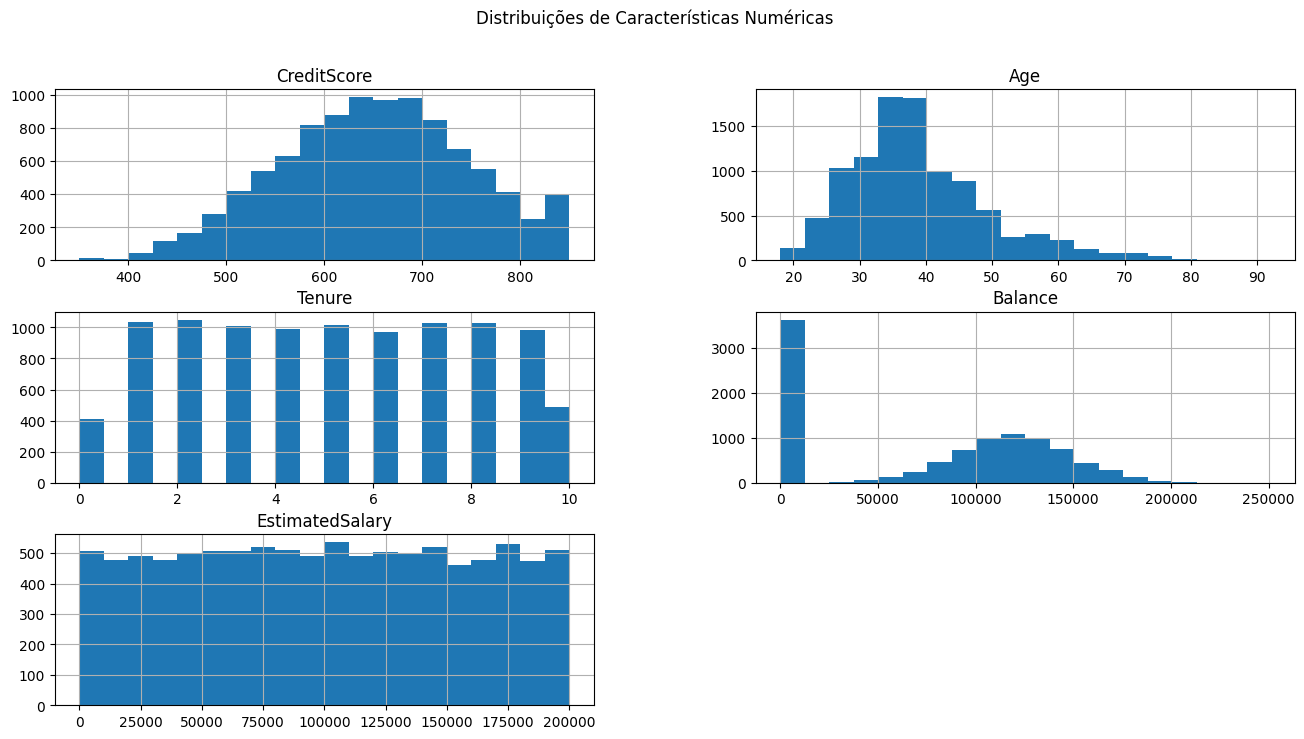

In [55]:
# Visualizar distribuições de características numéricas
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
data[numerical_features].hist(bins=20, figsize=(16, 8), layout=(3, 2))
plt.suptitle("Distribuições de Características Numéricas")
plt.show()

Estes histogramas representam as distribuições de cinco variáveis numéricas: ***CreditScore***, ***Age***, ***Tenure***, ***Balance*** e ***EstimatedSalary***.

- ***CreditScore***: A distribuição é aproximadamente simétrica, concentrada em torno de valores médios entre 600 e 750.
- ***Age***: A maioria dos clientes está na faixa etária entre 30 e 40 anos, com uma cauda longa indicando a presença de clientes mais velhos.
- ***Tenure***: Os valores de permanência estão bem distribuídos, sem grandes concentrações em faixas específicas.
- ***Balance***: Observa-se uma grande quantidade de clientes com saldo zero, seguido por uma distribuição aproximadamente normal para os demais saldos.
- ***EstimatedSalary***: A distribuição é quase uniforme, indicando que a renda estimada dos clientes está espalhada uniformemente em diferentes faixas.

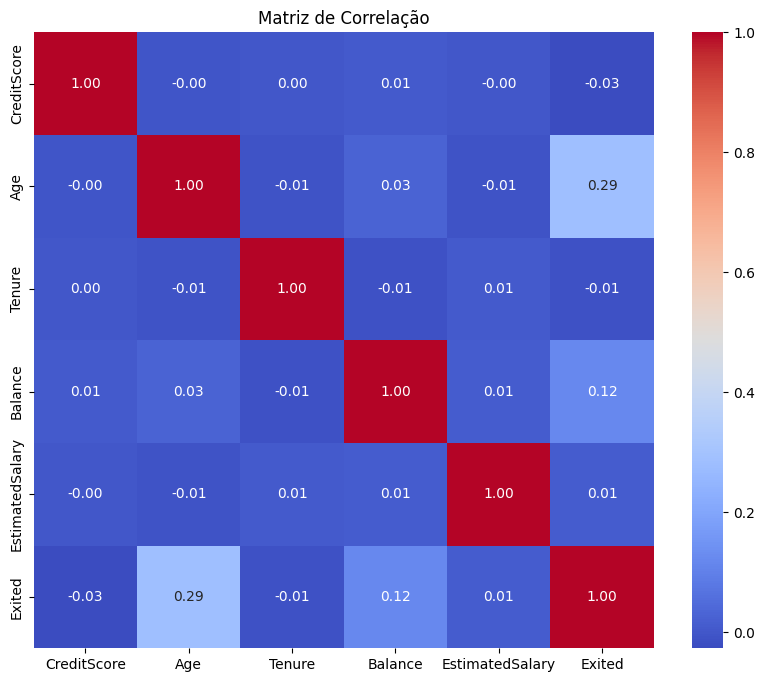

In [57]:
# Correlações entre características numéricas
corr_matrix = data[numerical_features + ["Exited"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

A matriz de correlação revela as relações entre as variáveis numéricas e a variável-alvo (***Exited***). A correlação de ***Age*** com ***Exited*** (`0.29`) indica uma relação moderada, sugerindo que clientes mais velhos têm maior probabilidade de sair, enquanto ***Balance*** mostra uma correlação fraca (`0.12`) com a saída. Variáveis como ***CreditScore***, ***Tenure*** e ***EstimatedSalary*** têm correlações muito baixas ou próximas de zero com ***Exited***, indicando que essas variáveis têm pouca influência linear na saída dos clientes. Essa análise destaca que idade e saldo são fatores potencialmente relevantes para prever o comportamento de saída dos clientes.

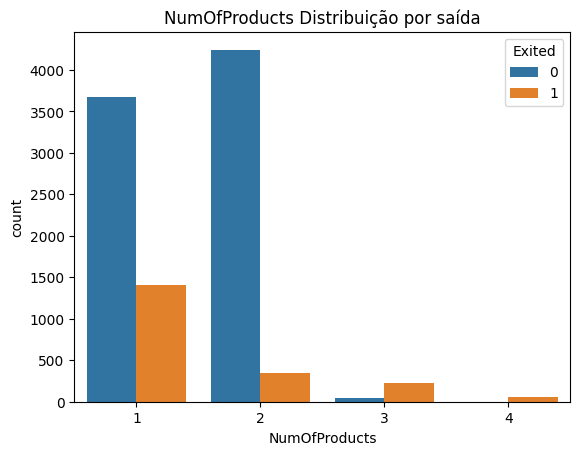

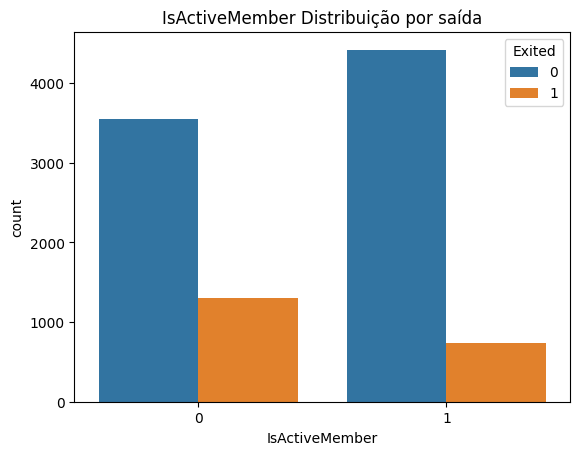

In [61]:
#Distribuições das features categóricas
categorical_features = [col for col in ["Geography", "Gender", "NumOfProducts", "IsActiveMember"] if col in data.columns]
for cat_feature in categorical_features:
    sns.countplot(x=cat_feature, hue="Exited", data=data)
    plt.title(f"{cat_feature} Distribuição por saída")
    plt.xlabel(cat_feature)
    plt.show()


Os dois gráficos de barras mostram as distribuições das variáveis categóricas ***NumOfProducts*** e ***IsActiveMember***, segmentadas pela variável-alvo ***Exited*** (`0` para clientes que permaneceram e `1` para aqueles que saíram).

- ***NumOfProducts***

A maioria dos clientes possui 1 ou 2 produtos bancários, com a proporção de saída (***Exited*** = 1) sendo maior entre aqueles com apenas 1 produto, enquanto a maioria dos clientes com 2 produtos permaneceu no banco. Poucos clientes possuem 3 ou 4 produtos, mas as taxas de saída aumentam conforme o número de produtos cresce.

- ***IsActiveMember***

Clientes ativos (***IsActiveMember*** = `1`) apresentam uma taxa de retenção significativamente maior em comparação aos inativos (***IsActiveMember*** = `0`), enquanto a proporção de clientes que saíram é muito mais elevada entre os inativos.


Os gráficos sugerem que a quantidade de produtos e o status de membro ativo são fatores relevantes para prever a saída dos clientes, com clientes inativos ou com menos produtos tendo maior probabilidade de sair.

### Pré-processamento dos Dados

In [66]:
# Separar em variável dependente (target) e independentes (features)
X = data.drop(columns="Exited")
y = data["Exited"]

In [70]:
# Pipeline de Pré-processamento de Dados
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
categorical_features = ["NumOfProducts", "IsActiveMember"]

# Escalar características numéricas e aplicar one-hot encoding às características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

Neste trecho é realizado o ajuste dos valores numéricos para que tenham uma escala uniforme, isso é realizado pois a Regressão Logística é sensível a magnitude das variáveis. Isso evita a causa de viés no treinamento do modelo dado por escalas diferentes entre as features. 

Para as variáveis categóricas transformei em representação numerica compatível com o modelo, para isso utilizei o OneHotEncoder, ao qual cria uma nova coluna para cada categoria única e atribui valores 0 e 1 (indicando a presença ou a ausência da categoria), neste caso também utilizei o `drop="frist"` para evitar a redundância de colunas extras e reduzindo o número de variáveis evitando assim o risco de multicolinearidade.


##### Divisão em treino e teste

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Divisão do conjunto de dados em `30%` para teste e `70%` para treinamento, garantindo que a divisão dos dados seja reprodutível. E também garantindo que a distribuição das classes da variável y seja preservada. 

##### Tratamento de desbalanceamento de classes com SMOTE

In [27]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

No conjunto de dados exite uma classe majoritária sendo clientes que permanecem `Exited=0` e uma classe minoritária `Exited=1` sendo os clientes que saem, esse desbalanceamento faz com que o modelo foque mais na classe majoritária, o que pode resultarem previsões enviesadas e baixa performace do modelo na identificação da classe minoritária. Para resolver este problema aplicou-se o SMOTE (***Synthetic Minority Oversampling Technique***) criando novos exemplos sintéticos da classe minoritária. Esse método gera dados sintéticos baseados em KNN (***K-nearest neighbors***) de cada ponto da classe minoritária. Isso preserva a variabilidade e reduz os riscos de ***overfiting*** [1].

#### Treinamento do modelo de Regressão Logística

In [28]:
# Criação do pipeline com a combinação do pré-processamento dos dados e o treinamento do modelo de Regressão Logística
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42, max_iter=500))
])


In [29]:
model.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['NumOfProducts',
                                                   'IsActiveMember'])])),
                ('classifier',
                 LogisticRegression(max_iter=500, random_state=42))])

In [72]:
# Interpretando os coeficientes do modelo
classifier = model.named_steps["classifier"]
coef_names = numerical_features + list(model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out())
coefficients = classifier.coef_.flatten()
coef_df = pd.DataFrame({"Feature": coef_names, "coeficiente": coefficients})
coef_df = coef_df.sort_values(by="coeficiente", ascending=False)

print("Coeficientes do Modelo de Regressão Logística:")
print(coef_df)

Coeficientes do Modelo de Regressão Logística:
            Feature  coeficiente
7   NumOfProducts_4     2.698145
6   NumOfProducts_3     1.921685
1               Age     0.801546
3           Balance     0.160928
4   EstimatedSalary     0.064657
0       CreditScore    -0.091363
2            Tenure    -0.111299
5   NumOfProducts_2    -1.470331
8  IsActiveMember_1    -1.836066


| **Feature**               | **Coeficiente** | **Interpretação**                                                                                                                                              |
|---------------------------|-----------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **NumOfProducts_4**       | 2.698           | Clientes com 4 produtos têm uma probabilidade muito maior de sair, indicando possível insatisfação ou prontidão para mudar de banco.                           |
| **NumOfProducts_3**       | 1.922           | Clientes com 3 produtos também têm uma probabilidade significativamente maior de saída, sugerindo comportamentos semelhantes aos com 4 produtos.               |
| **Age**                   | 0.801           | Idade mais avançada está associada a maior probabilidade de saída, possivelmente devido a preferências mais exigentes ou disposição de mudar de banco.         |
| **Balance**               | 0.161           | Um saldo maior está moderadamente associado a uma chance maior de saída, possivelmente indicando clientes explorando outras opções financeiras.                |
| **EstimatedSalary**       | 0.065           | O salário estimado tem uma influência fraca, mas positiva, na saída. Clientes com salários mais altos podem ter menos barreiras para mudar de banco.           |
| **CreditScore**           | -0.091          | Um CreditScore mais alto reduz levemente a probabilidade de saída. Clientes com bom histórico de crédito tendem a ser mais leais e estáveis.                   |
| **Tenure**                | -0.111          | Um tempo maior de relacionamento com o banco está ligeiramente associado à retenção, refletindo uma fidelidade moderada ao longo do tempo.                     |
| **NumOfProducts_2**       | -1.470          | Clientes com 2 produtos têm menor probabilidade de saída, indicando um equilíbrio entre engajamento e satisfação.                                               |
| **IsActiveMember_1**      | -1.836          | Ser um cliente ativo reduz significativamente a chance de saída, pois clientes engajados tendem a ser mais leais.                                               |




| **Insight Estratégico**                     | **Descrição**                                                                                                             |
|---------------------------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **Risco em clientes com 3 ou 4 produtos**   | Clientes com muitos produtos devem ser monitorados, pois estão altamente propensos a sair. O banco pode oferecer incentivos personalizados para retê-los. |
| **Clientes mais velhos**                    | Estratégias de retenção específicas devem ser desenvolvidas para clientes mais velhos, que parecem estar mais propensos a sair.                              |
| **Engajamento é chave**                     | Garantir que clientes sejam ativos (ex.: aumentar interações, campanhas de engajamento) é crucial para reduzir a saída.                                       |
| **Clientes com 2 produtos são mais estáveis**| O banco pode estudar como replicar esse equilíbrio de engajamento em clientes com 1, 3 ou mais produtos.                                                     |


### Avaliação do Modelo

> **Nota**:  
> A AUC-ROC avalia a capacidade de um modelo de classificação em distinguir entre classes [1].  
> - A curva ROC relaciona **sensibilidade** com **1 - especificidade**.  
> - A AUC mede numericamente a área sob essa curva, indicando a qualidade do modelo.  
> - Valores variam de:  
>   - **0.5**: Sem discriminação (equivalente a um chute aleatório).  
>   - **1.0**: Separação perfeita entre as classes.  
> - Quanto mais próximo de **1**, melhor o desempenho do modelo.


In [74]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# AUC-ROC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.83


O AUC de 0.83 mostra que o modelo tem um bom desempenho na discriminação entre clientes que permanecem e saem.

In [75]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1795  594]
 [ 177  434]]


##### Análise detalhada da matriz de confusão

| **Elemento**             | **Valor** | **Descrição**                                                                                                             |
|---------------------------|-----------|-------------------------------------------------------------------------------------------------------------------------|
| **Verdadeiros Negativos (TN)** | 1795      | Número de clientes que realmente permaneceram (`0`) no banco e foram corretamente previstos como permanecendo (`0`). Indica previsões corretas para a classe majoritária. |
| **Falsos Positivos (FP)**      | 594       | Número de clientes que realmente permaneceram (`0`) no banco, mas foram previstos como saindo (`1`). Representa erros do modelo ao prever saída incorretamente. |
| **Falsos Negativos (FN)**      | 177       | Número de clientes que realmente saíram (`1`) do banco, mas foram previstos como permanecendo (`0`). São erros críticos ao não identificar clientes em risco de saída. |
| **Verdadeiros Positivos (TP)** | 434       | Número de clientes que realmente saíram (`1`) do banco e foram corretamente previstos como saindo (`1`). Indica acertos importantes ao identificar clientes em risco. |


In [80]:
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2389
           1       0.42      0.71      0.53       611

    accuracy                           0.74      3000
   macro avg       0.67      0.73      0.68      3000
weighted avg       0.81      0.74      0.76      3000



| **Métrica**           | **Classe** | **Valor** | **Interpretação**                                                                                 |
|------------------------|------------|-----------|---------------------------------------------------------------------------------------------------|
| **Precision**          | 0          | **0.91**  | 91% das previsões de que os clientes permaneceram estavam corretas. Poucos falsos positivos.      |
| **Precision**          | 1          | **0.42**  | Apenas 42% das previsões de saída estavam corretas, indicando muitos falsos positivos.            |
| **Recall (Sensibilidade)** | 0     | **0.75**  | 75% dos clientes que realmente permaneceram foram identificados corretamente.                     |
| **Recall (Sensibilidade)** | 1     | **0.71**  | 71% dos clientes que realmente saíram foram identificados corretamente.                           |
| **F1-Score**           | 0          | **0.82**  | O desempenho na classe de clientes que permaneceram é equilibrado entre precisão e recall.        |
| **F1-Score**           | 1          | **0.53**  | Desempenho moderado para a classe de clientes que saíram, devido à baixa precisão e bom recall.    |
| **Accuracy**           | Geral      | **0.74**  | O modelo acertou 74% das previsões em todo o conjunto de teste.                                   |
| **Macro Average**      | Geral      | Precision: **0.67**<br>Recall: **0.73**<br>F1-Score: **0.68** | Média geral entre as classes, sem levar em conta o tamanho de cada classe.                        |
| **Weighted Average**   | Geral      | Precision: **0.81**<br>Recall: **0.74**<br>F1-Score: **0.76** | Média geral ponderada pelo número de amostras em cada classe, refletindo o desempenho global.      |


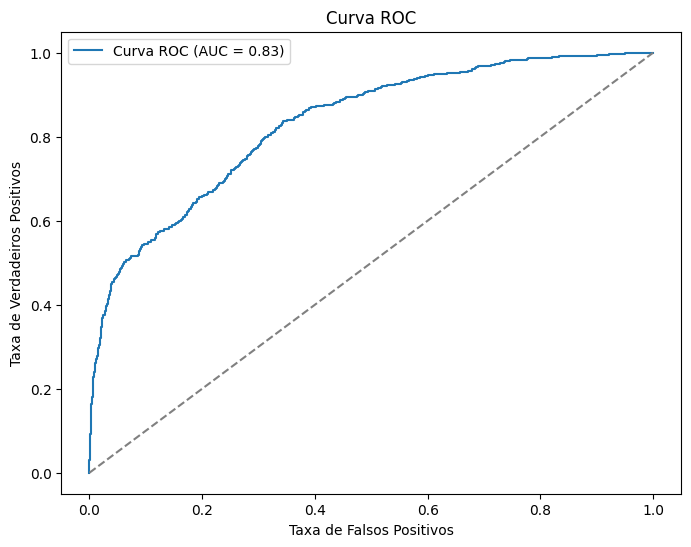

In [82]:
# Gráfico com a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

A imagem mostra a Curva ROC, com uma AUC de 0.83, indicando que o modelo tem boa capacidade de distinguir entre clientes que permanecem e os que saem, superando o desempenho aleatório e equilibrando sensibilidade e taxa de falsos positivos.

### Conclusão

A modelo para prever a evasão de clientes bancários demonstrou eficácia ao identificar padrões de saída, com uma AUC de `0.83`, indicando boa capacidade de discriminação. O modelo alcançou um recall de `71%`, essencial para estratégias de retenção, embora a precisão de `42%` evidencie a necessidade de ajustes para reduzir falsos positivos. Fatores como número de produtos, atividade do cliente e idade se destacaram como variáveis-chave, oferecendo insights valiosos. Melhorias, como uso de modelos avançados e análise de novas variáveis, podem aumentar a precisão e integrar o modelo, otimizando a retenção de clientes.

## Referências

1. Rahim, A. H. A., Rashid, N. A., Nayan, A., & Ahmad, A. R. (2019). **Smote approach to imbalanced dataset in logistic regression analysis**. *In Proceedings of the Third International Conference on Computing, Mathematics and Statistics (iCMS2017) Transcending Boundaries, Embracing Multidisciplinary Diversities* (pp. 429-433). Springer Singapore.  
   [Link para o artigo](https://link.springer.com/chapter/10.1007/978-981-13-7279-7_53)
